In [5]:
import sys
sys.path.append('C:/Users/dinle/Code/Learning/Py_Code/AI_Learning/NodeLayer')
sys.path.append('C:/Users/dinle/Code/Learning/Py_Code/AI_Learning/mnist')
from NodeLayer.simple_convnet import SimpleConvNet as cv1
from mnist.ch07.simple_convnet import SimpleConvNet as cv2

import matplotlib.pyplot as plt
from mnist.dataset.mnist import load_mnist
from mnist.common.util import smooth_curve
from mnist.common.optimizer import *
import numpy as np
import time


In [6]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
test_size = x_test.shape[0]
batch_size = 128
max_iterations = 1000
mi = np.arange(max_iterations)
optimizer = AdaGrad()

In [7]:
def test(test_list):
    networks = {}
    train_acc = {}
    train_loss = {}
    test_acc = {}
    test_loss = {}
    optimizer = {}
    time_record = {}

    for key in test_list.keys():
        # 기록 리스트 생성
        train_acc[key] = []
        train_loss[key] = []
        test_acc[key] = []
        test_loss[key] = []
        time_record[key] = 0

        # nSigmoid 경우 파라미터
        # key == 'nSigmoid_8' -> act = nSigmoid, threshold = 8
        model = test_list[key]['model']
        lr = test_list[key]['lr']


        # 네트워크와 optimizer 생성
        if model == 'cv1':
            networks[key] = cv1()
        else:
            networks[key] = cv2()
        optimizer[key] = AdaGrad(lr)

    # 학습
    for i in range(max_iterations):

        # mini-batch train
        batch_mask = np.random.choice(train_size, batch_size)
        x_batch = x_train[batch_mask]
        t_batch = t_train[batch_mask]

        # mini-batch test
        batch_mask_t = np.random.choice(test_size, batch_size)
        x_batch_t = x_test[batch_mask_t]
        t_batch_t = t_test[batch_mask_t]

        if i % 10 == 0:
            print( "===========" + "iteration:" + str(i) + "===========")

        # 학습
        for key in test_list.keys():
            start = time.time()
            x_batch = x_batch.reshape(-1, 1, 28, 28)
            x_batch_t = x_batch_t.reshape(-1, 1, 28, 28)
            # 학습
            grads = networks[key].gradient(x_batch, t_batch)
            optimizer[key].update(networks[key].params, grads)

            # 기록
            train_acc[key].append(networks[key].accuracy(x_batch, t_batch))
            train_loss[key].append(networks[key].loss(x_batch, t_batch))
            test_acc[key].append(networks[key].accuracy(x_batch_t, t_batch_t))
            test_loss[key].append(networks[key].loss(x_batch_t, t_batch_t))


            # 100회마다 경과 출력
            if i % 10 == 0:
                # print(key + " loss:" + str(acc))
                t_loss = networks[key].loss(x_batch_t, t_batch_t)
                end = time.time()
                time_record[key] += (end-start)
                print(key + " loss:" + str(t_loss) + " time:" + str(time_record[key]))
            else:
                end = time.time()
                time_record[key] += (end-start)

    return train_acc, train_loss, test_acc, test_loss


def plot(label, datas, t_list, *y_lim):
    for key in t_list:
        plt.plot(mi, smooth_curve(datas[key]), markevery=50, label=key)
    plt.xlabel("iterations")
    plt.ylabel(label)
    if y_lim:
        plt.ylim(y_lim)
    plt.legend()
    plt.show()

In [8]:
test_list = {
             'my_Network':
                 {'model':'cv1','lr':0.01},
              'textbook':
                {'model':'cv2','lr':0.01},
             }



train_acc, train_loss, test_acc, test_loss = test(test_list)

myCon
text
===========iteration:0===========
my_Network loss:2.286515047388146 time:1.0250890254974365
textbook loss:2.275138460372246 time:0.6205153465270996
===========iteration:10===========
my_Network loss:0.8294240348362638 time:6.704922437667847
textbook loss:0.7887523479488372 time:6.031161308288574
===========iteration:20===========
my_Network loss:0.6500646275214619 time:12.412250995635986
textbook loss:0.6575984592123959 time:12.115127801895142
===========iteration:30===========
my_Network loss:0.45609843300037345 time:18.070494890213013
textbook loss:0.461602444142064 time:17.782050371170044
===========iteration:40===========
my_Network loss:0.4314469271614098 time:23.662778854370117
textbook loss:0.435203701516878 time:23.144734621047974
===========iteration:50===========
my_Network loss:0.40947610325705763 time:29.22569489479065
textbook loss:0.4257114831764165 time:28.536511659622192
===========iteration:60===========
my_Network loss:0.23803449388061573 time:34.8043317794

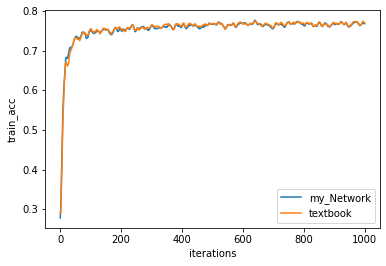

In [9]:
plot('train_acc', train_acc, test_list)

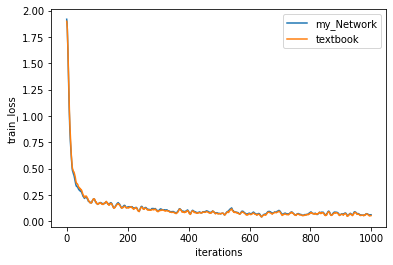

In [10]:
plot('train_loss', train_loss, test_list)